In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Data Collection & Analysis
insr_data=pd.read_csv('insurance.csv')
insr_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
#lebel encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insr_data['sex'] = le.fit_transform(insr_data['sex'])
insr_data['smoker'] = le.fit_transform(insr_data['smoker'])
insr_data['region'] = le.fit_transform(insr_data['region'])
insr_data.head()




,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


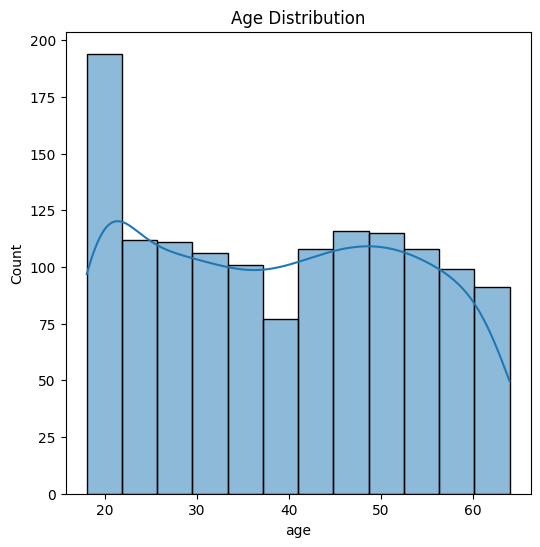

In [24]:
#Visualizing the data
#Distribution of age value
plt.figure(figsize=(6,6))
sns.histplot(insr_data['age'],kde=True)
plt.title('Age Distribution')
plt.show()

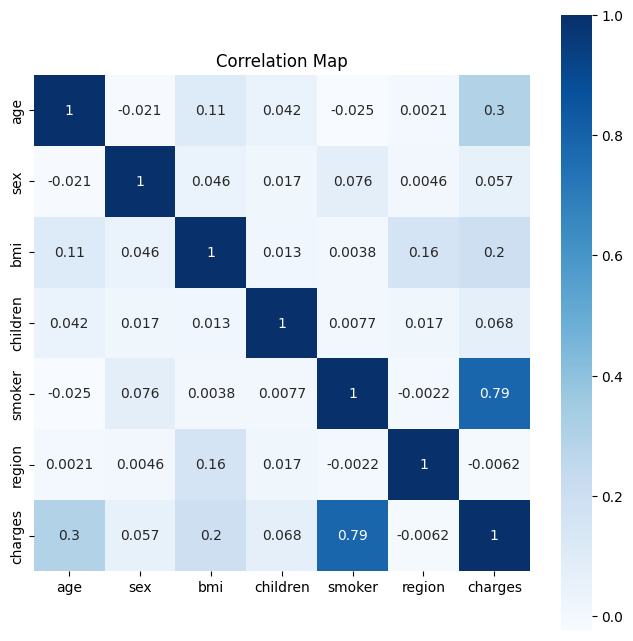

In [25]:
#Use correlation map to see the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(insr_data.corr(),cmap='Blues',annot=True,square=True)
plt.title('Correlation Map')
plt.show()

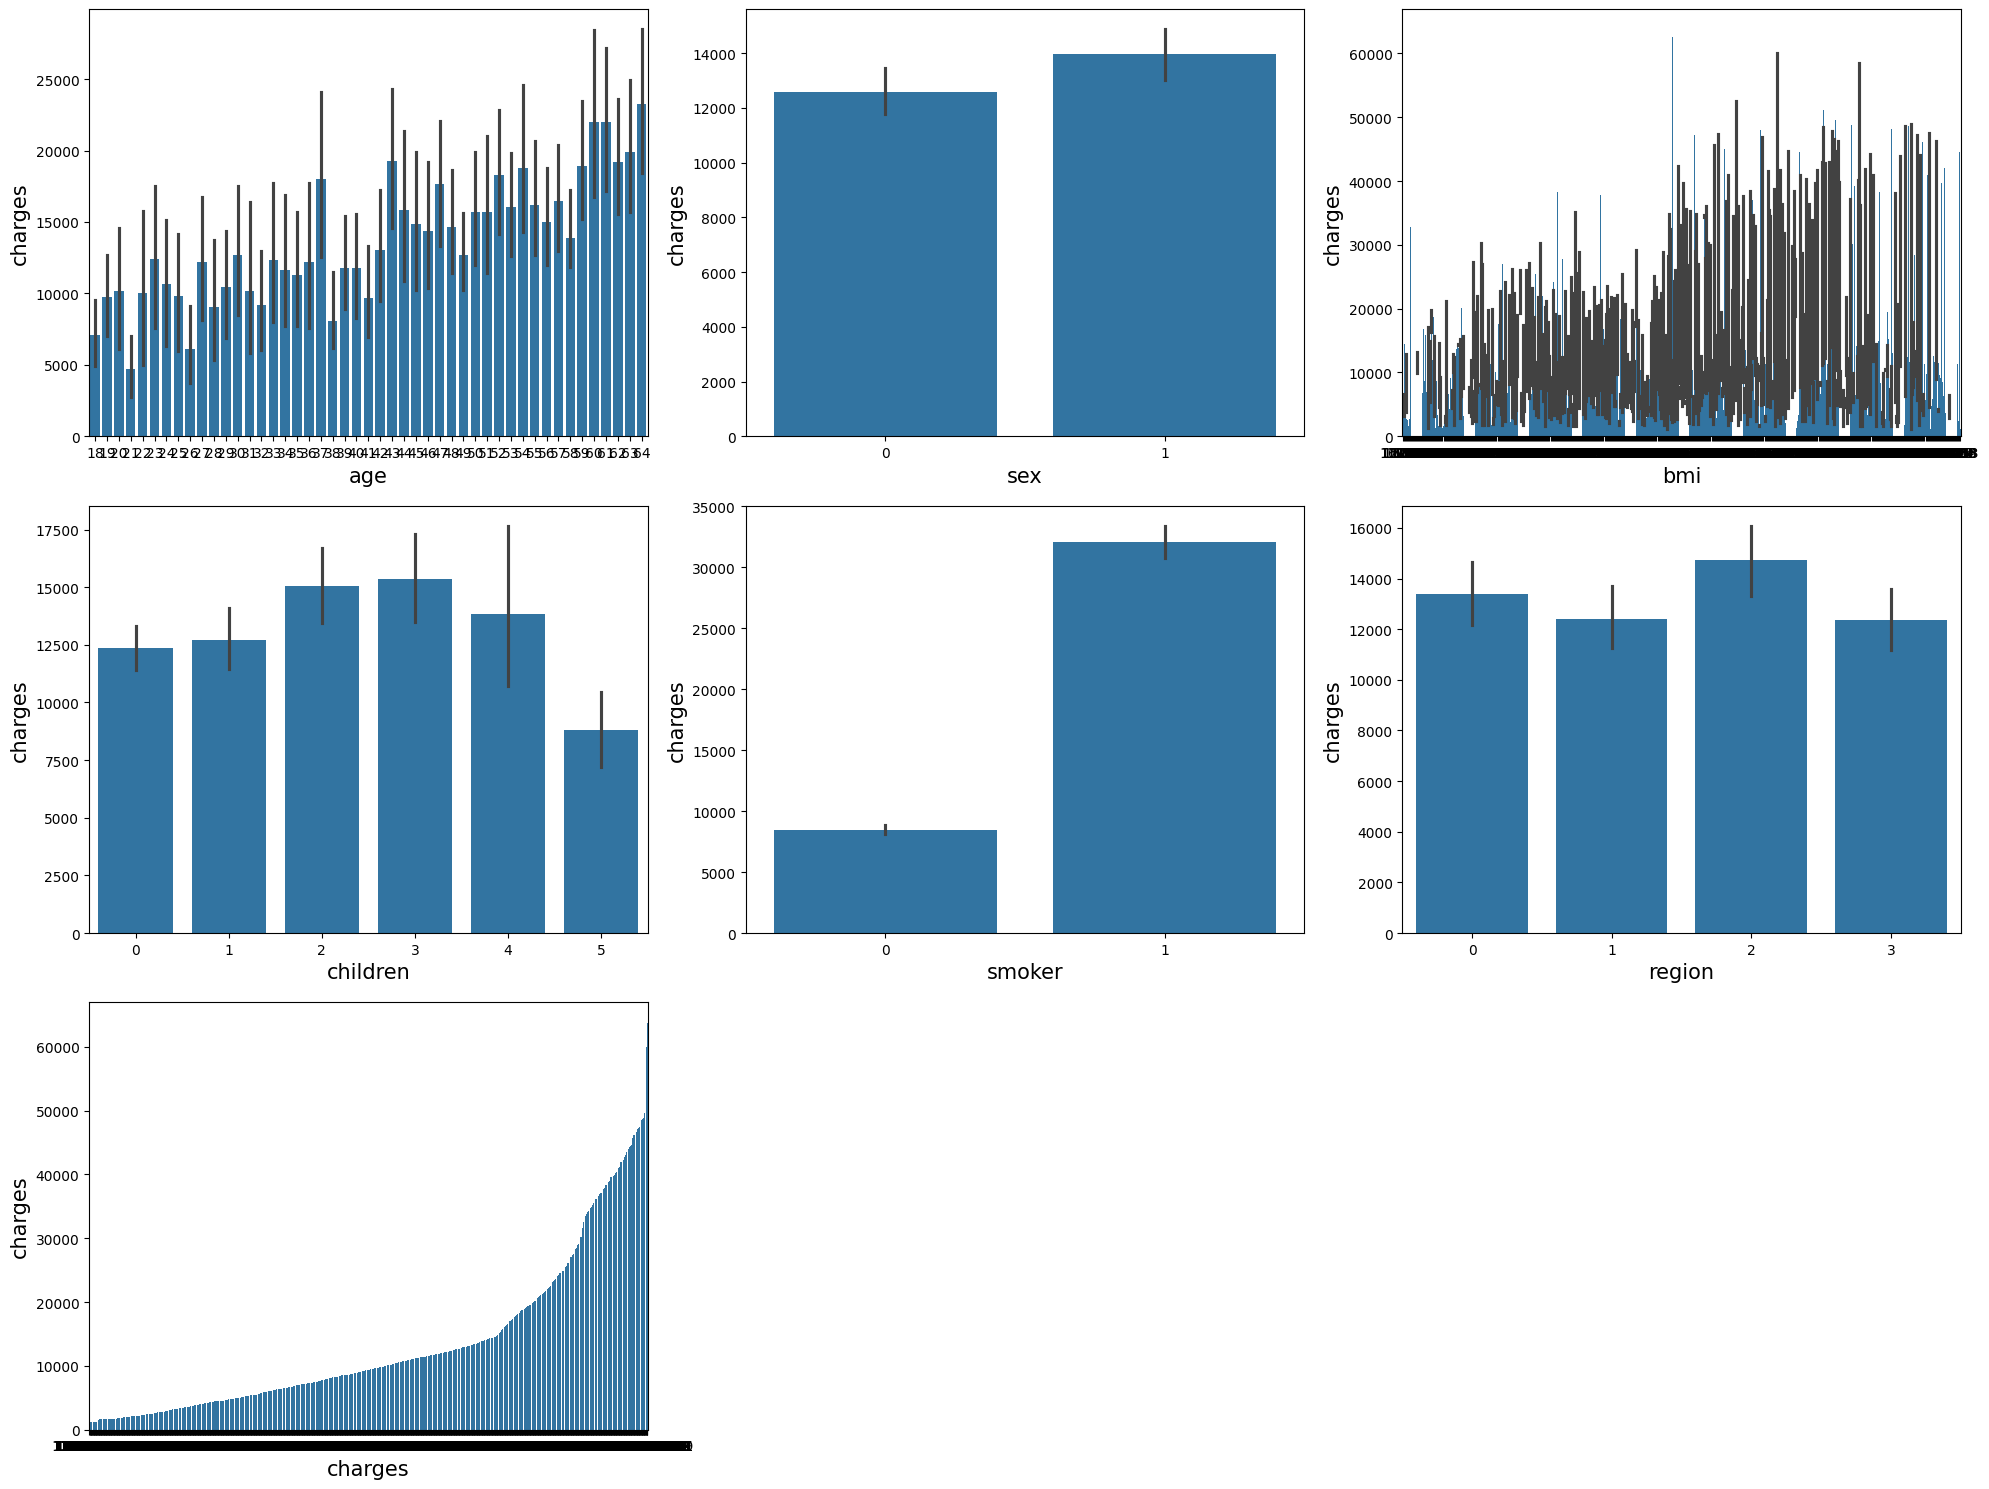

In [26]:
#vizualizing all the columns data with respect to charges column using bar plot
plt.figure(figsize=(20,15))
plotnumber=1
for column in insr_data:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x=insr_data[column],y=insr_data['charges'])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('charges',fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

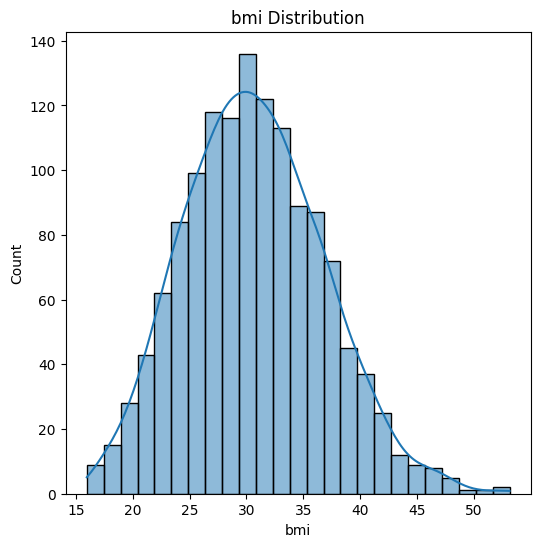

In [27]:
#vizualizing the distribution of bmi value
plt.figure(figsize=(6,6))
sns.histplot(insr_data['bmi'],kde=True)
plt.title('bmi Distribution')
plt.show()

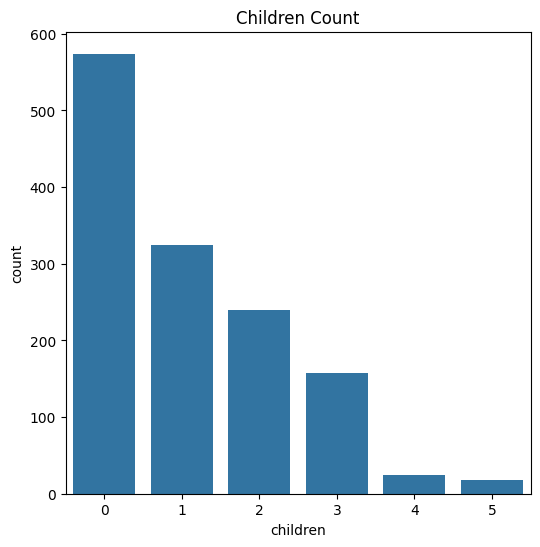

In [28]:
#children column value counts vizualization
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insr_data)
plt.title('Children Count')
plt.show()



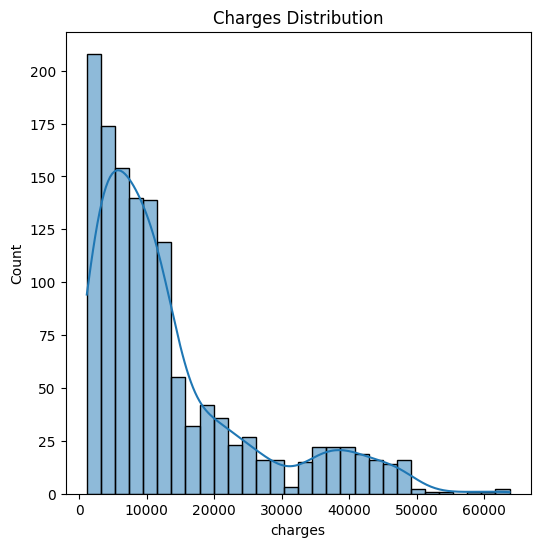

In [29]:
#for charges column distribution
plt.figure(figsize=(6,6))
sns.histplot(insr_data['charges'],kde=True)
plt.title('Charges Distribution')
plt.show()

In [30]:
#linear regression model
#training and testing data
#accuracy score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=insr_data.drop(columns='charges',axis=1)
Y=insr_data['charges']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)



(1338, 6) (1070, 6) (268, 6)


In [33]:
#training the model and making predictions
model=LinearRegression()
model.fit(X_train,Y_train)
#prediction on test data
Y_pred=model.predict(X_test)
test_score=model.score(X_test,Y_test)
print("Test Score:",test_score)
#R squared error
r2 = r2_score(Y_test, Y_pred)
print("R squared error:", r2)


Test Score: 0.7445422986536503
R squared error: 0.7445422986536503


In [35]:
#predicting the insurance cost for a new person
input_data=(31,0,25.74,0,2,3)
#changing the input_data to numpy array
input_data_as_numpy_array=np.array(input_data)
#reshaping the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("The insurance cost predicted is:",prediction[0])


The insurance cost predicted is: 51399.750895592326


c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
#save the trained model and label encoder
import pickle
#saving the model
with open('insurance_model.pkl','wb') as f:
    pickle.dump(model,f)
#saving the label encoder
with open('label_encoder.pkl','wb') as f:
    pickle.dump(le,f)
    